# LSTM Time Series - Stock Price Prediction
## Part 2 - Data Preprocessing
In this notebook, we load the filtered data set file containing the historical prices of Google stocks for the last five years and preprocess it.

> **INPUT**: The filtered data set file of the last five years of Google's stock prices, as filtered in the previous phase. <br/>
> **OUTPUT**: The preprocessed and transformed data, split into training, validation, and testing subsets, and stored in an intermediary location for the training phase.

### 1. INITIALIZATION

In [23]:
# Import necessary libraries and modules
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import joblib

In [24]:
# Set output width
pd.set_option("display.width", 120)

### 2. LOADING DATASET

In [25]:
# Prepare data file location and name
data_file_location = "..//data//interim//"
data_file_name = "google_stock_price_recent"
data_file_ext = "csv"

# Load data file
data = pd.read_csv(data_file_location + data_file_name + "." + data_file_ext)

In [26]:
# Check loaded data shape
data.shape

(1323, 7)

In [27]:
# Check loaded data head
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,50.828499,52.616001,50.785500,52.292500,52.292500,30652000
1,2019-01-03,52.049999,52.848999,50.703499,50.803001,50.803001,36822000
2,2019-01-04,51.629501,53.542000,51.370899,53.535500,53.535500,41878000
3,2019-01-07,53.575001,53.700001,52.737999,53.419498,53.419498,39638000
4,2019-01-08,53.805500,54.228001,53.026501,53.813999,53.813999,35298000


In [28]:
# Check columns types
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

### 3. DATA PREPROCESSING

#### Validate Data Types

In [29]:
# Convert date column to a valid Datetime format
data["Date"] = pd.to_datetime(data["Date"])

# Check column types
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

#### Select Independent Features

The objective of this analysis is to implement a multi-variant prediction, taking into account possible impact of several independent features such as the Open price, Close price and Volume on future stock price performance.

For this reason, we will consider in this analysis all available variables: 
- Opening price
- Highest price
- Lowest price
- Closing price
- Adjusted closing price
- Trading volume

These features will be used to predict the future closing price.

In [30]:
# Define selected features and target attribute
features = ["Open", "High", "Low",	"Close", "Adj Close", "Volume"]
target = "Open"

#### Split Data into Train, Validation, and Test

In order to track and validate the performance of our model, we will divide the available dataset of recent stock prices into three parts: training, validation, and testing sets.

The split will be as follows:
- **Training dataset:** covering the period from the start of 2019 till June, 2023.
- **Validation dataset:** representing the stock prices from July, 2023 till the end of 2024.
- **Testing dataset:** representing the stock prices for the first two months of 2024.

In [31]:
# Define start and end time for each period
train_end_date = pd.to_datetime("2023-06-30")
validate_start_date = pd.to_datetime("2023-07-01")
validate_end_date = pd.to_datetime("2023-12-31")
test_start_date = pd.to_datetime("2024-01-01")
test_end_date = pd.to_datetime("2024-02-29")

# Split dataset into training, validation, and testing
data_train = data[data["Date"] <= train_end_date][features]
data_train_dates = data[data["Date"] <= train_end_date]["Date"]
data_validate = data[(data["Date"] >= validate_start_date) & (data["Date"] <= validate_end_date)][features]
data_validate_dates = data[(data["Date"] >= validate_start_date) & (data["Date"] <= validate_end_date)]["Date"]
data_test = data[(data["Date"] >= test_start_date) & (data["Date"] <= test_end_date)][features]
data_test_dates = data[(data["Date"] >= test_start_date) & (data["Date"] <= test_end_date)]["Date"]

In [32]:
# Display the shape of each dataset
print(f"Training Set: {data_train.shape}")
print(f"Validation Set: {data_validate.shape}")
print(f"Testing Set: {data_test.shape}")

Training Set: (1132, 6)
Validation Set: (126, 6)
Testing Set: (41, 6)


In [33]:
# Display a summary of each dataset
print("Training Dataset:")
print(data_train.head())
print("Validation Dataset:")
print(data_validate.head())
print("Testing Dataset:")
print(data_test.head())

Training Dataset:
        Open       High        Low      Close  Adj Close    Volume
0  50.828499  52.616001  50.785500  52.292500  52.292500  30652000
1  52.049999  52.848999  50.703499  50.803001  50.803001  36822000
2  51.629501  53.542000  51.370899  53.535500  53.535500  41878000
3  53.575001  53.700001  52.737999  53.419498  53.419498  39638000
4  53.805500  54.228001  53.026501  53.813999  53.813999  35298000
Validation Dataset:
            Open        High         Low       Close   Adj Close    Volume
1132  120.320000  121.019997  119.705002  120.559998  120.559998  13888300
1133  120.059998  123.370003  120.059998  122.629997  122.629997  17830300
1134  120.639999  121.150002  119.250000  120.930000  120.930000  17732500
1135  120.889999  121.750000  120.089996  120.139999  120.139999  20982400
1136  119.070000  119.070000  116.639999  116.870003  116.870003  32960100
Testing Dataset:
            Open        High         Low       Close   Adj Close    Volume
1258  139.600006  

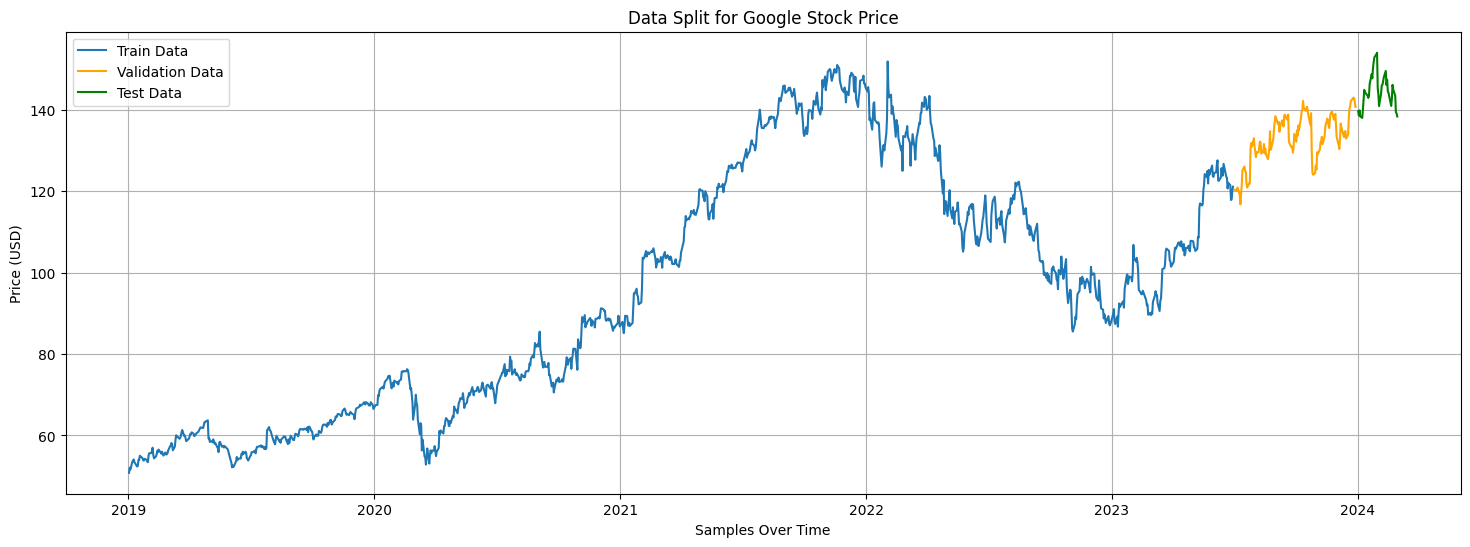

In [34]:
# Plot the stock price for each of the data splits
plt.figure(figsize=(18,6))
plt.plot(data_train_dates, data_train["Open"])
plt.plot(data_validate_dates, data_validate["Open"], color="orange")
plt.plot(data_test_dates, data_test["Open"], color="green")
plt.legend(["Train Data", "Validation Data", "Test Data"])
plt.title("Data Split for Google Stock Price")
plt.xlabel("Samples Over Time")
plt.ylabel("Price (USD)")
plt.grid()

#### Data Scaling

In [35]:
# Check the distribution of input features
data[features].describe()

,Open,High,Low,Close,Adj Close,Volume
count,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1.323000e+03
mean,100.882880,102.042442,99.853834,100.974635,100.974635,2.882756e+07
std,31.078299,31.360869,30.780336,31.059813,31.059813,1.268332e+07
min,50.828499,52.374500,50.676800,50.803001,50.803001,6.936000e+06
25%,71.211247,71.905250,70.356251,70.992001,70.992001,2.076335e+07
50%,102.825996,103.927498,101.500000,102.751503,102.751503,2.575600e+07
75%,130.778503,132.021675,129.389999,130.440002,130.440002,3.287305e+07
max,155.080002,157.000000,154.132004,156.500000,156.500000,1.241400e+08


Looking at these details, it's noticeable and anticipated that all price values have similar distributions given they log the price fluctuation on daily basis.

Nevertheless, the trading volume represents a different aspect and it has a completely distinct distribution. 

Accordingly, input features need to be transformed into a unified scale and since the distribution doesn't indicate any outliers, we will use the [0,1] range to represent all features.

To avoid data leakage, we fit the scaler to the training data only and then use this scaler to transform training, validation and testing datasets. 

In [36]:
# Initialize scaler with range [0,1]
sc = MinMaxScaler(feature_range=(0,1))

# Fit and transform training dataset
data_train_scaled = sc.fit_transform(data_train)

# Transform validating and testing datasets
data_validate_scaled = sc.transform(data_validate)
data_test_scaled = sc.transform(data_test)

The used scaler will be used again in the upcoming phases to restore the scaled data to its original distribution, for this reason we need to store this scaler to a local folder.

In [37]:
# Prepare scaler model name and location
scaler_model_location = "..//models//"
scaler_model_name = "google_stock_price_scaler"
scaler_model_ext = "gz"

# Store the scaler model
joblib.dump(sc, scaler_model_location + scaler_model_name + "." + scaler_model_ext)

['..//models//google_stock_price_scaler.gz']

### 4. STORING PROCESSED DATASETS

Training, validation, and testing datasets are processed and ready to be used for training the LSTM model in the next phase.

Before saving the datasets, we need first to recombine the dates for each corresponding datasets to be used later in the model performance evaluation.

In [38]:
# Combine dates with each corresponding dataset
data_train_scaled_final = pd.DataFrame(data_train_scaled, columns=features, index=None)
data_train_scaled_final["Date"] = data_train_dates.values

data_validate_scaled_final = pd.DataFrame(data_validate_scaled, columns=features, index=None)
data_validate_scaled_final["Date"] = data_validate_dates.values

data_test_scaled_final = pd.DataFrame(data_test_scaled, columns=features, index=None)
data_test_scaled_final["Date"] = data_test_dates.values

In [39]:
# Prepare datasets files and location
data_file_location = "..//data//processed//"
data_file_name_train = "google_stock_price_processed_train"
data_file_name_validate = "google_stock_price_processed_validate"
data_file_name_test = "google_stock_price_processed_test"
data_file_ext = "csv"

# Store datasets
data_train_scaled_final.to_csv(data_file_location + data_file_name_train + "." + data_file_ext, index=None)
data_validate_scaled_final.to_csv(data_file_location + data_file_name_validate + "." + data_file_ext, index=None)
data_test_scaled_final.to_csv(data_file_location + data_file_name_test + "." + data_file_ext, index=None)